# Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [48]:
df=pd.read_csv('vehicles.csv')

In [49]:
df.shape

(258888, 26)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

In [51]:
try:
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d %b %I:%M %p', errors='coerce')
except Exception as e:
    print(f"Error: {e}")

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'])

In [53]:
df['price'] = df['price'].astype(str)

# Initialize a counter for non-numeric values
# non_numeric_count = 0

# Function to clean and convert the price column
def clean_price(price_str):
    global non_numeric_count
    try:
        # Remove 'Rs ' and commas
        clean_str = price_str.replace('Rs ', '').replace(',', '')
        # Convert to float
        return float(clean_str)
    except ValueError:
        # If conversion fails, increment the counter and return NaN
        # non_numeric_count += 1
        return np.nan

# Apply the function to the price column
df['price'] = df['price'].apply(clean_price)

# # Output the count of non-numeric values
# print(f"Count of non-numeric values: {non_numeric_count}")

In [54]:
def clean_details(details_str):
    if isinstance(details_str, str):  # Check if the value is a string
        try:
            # Remove ' km' and commas
            clean_str = details_str.replace(' km', '').replace(',', '')
            # Convert to float
            return float(clean_str)
        except ValueError:
            # If conversion fails, return NaN or handle as needed
            return None  # or np.nan if numpy is imported
    else:
        return None  # Handle non-string values gracefully
df['details'] = df['details'].apply(clean_details)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype                    
---  ------                --------------   -----                    
 0   ad_title              258888 non-null  object                   
 1   ad_description        258881 non-null  object                   
 2   details               155505 non-null  float64                  
 3   slug                  258888 non-null  object                   
 4   title                 258888 non-null  object                   
 5   type                  258888 non-null  object                   
 6   price                 253404 non-null  float64                  
 7   timestamp             258882 non-null  datetime64[ns]           
 8   posted_date           258882 non-null  datetime64[ns, UTC+05:30]
 9   deactivation_date     258882 non-null  datetime64[ns, UTC]      
 10  category              258888 non-null  objec

In [56]:
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     5484
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [57]:
median_value = df['price'].median()
print(f"Median value of 'price' column: {median_value}")

# Fill missing values in the 'price' column with the median value
df['price'].fillna(median_value, inplace=True)

# Print the DataFrame after filling missing values
print("DataFrame after filling missing values in 'price' column:")

Median value of 'price' column: 285000.0
DataFrame after filling missing values in 'price' column:


C:\Users\Hp\AppData\Local\Temp\ipykernel_20236\636227844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(median_value, inplace=True)


In [58]:
df.dropna(subset=['timestamp', 'posted_date', 'deactivation_date', 'is_member', 'is_authorized_dealer', 'is_featured_member'], inplace=True)

In [59]:
columns_to_drop = ['ad_description', 'details','slug']
df = df.drop(columns=columns_to_drop)

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['is_member']] = imputer.fit_transform(df[['is_member']])
df[['is_authorized_dealer']] = imputer.fit_transform(df[['is_authorized_dealer']])
df[['is_featured_member']] = imputer.fit_transform(df[['is_featured_member']])

In [61]:
imputer = SimpleImputer(strategy='most_frequent')
df[['member_since']] = imputer.fit_transform(df[['member_since']])

In [62]:
df.isnull().sum()

ad_title                0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
member_since            0
properties              0
user                    0
dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['is_delivery_free']=label.fit_transform(df['is_delivery_free'])
df['is_doorstep_delivery']=label.fit_transform(df['is_doorstep_delivery'])
df['is_dsd_applicable']=label.fit_transform(df['is_dsd_applicable'])
df['is_verified']=label.fit_transform(df['is_verified'])
df['type']=label.fit_transform(df['is_verified'])
df['location']=label.fit_transform(df['is_verified'])
df['is_member']=label.fit_transform(df['is_member'])
df['is_authorized_dealer']=label.fit_transform(df['is_authorized_dealer'])
df['is_featured_member']=label.fit_transform(df['is_featured_member'])
df['membership_level']=label.fit_transform(df['membership_level'])

In [65]:
df.head(20)

,ad_title,title,type,price,timestamp,posted_date,deactivation_date,category,parent_category,location,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,Nissan Tiida Alternator,1,18000.0,1900-02-23 23:35:00,2023-02-23 23:35:10+05:30,2022-05-30 17:13:04+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,2,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Axio 165 Tail Light,1,67000.0,1900-02-23 08:32:00,2023-02-23 08:32:44+05:30,2022-03-31 16:27:59+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,1,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Axio 165 / 161 Head light,1,85000.0,1900-12-01 20:27:00,2022-12-01 20:27:49+05:30,2022-03-31 14:03:57+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,1,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Vigo side step ( Foot board),0,47000.0,1900-12-04 14:47:00,2022-12-04 14:47:27+05:30,2022-07-29 13:22:59+00:00,Auto Parts & Accessories,Vehicles,0,...,0,0,1,0,0,0,1,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,Vigo Dickey Door Garnish Cover,0,9000.0,1900-12-08 09:28:00,2022-12-08 09:28:04+05:30,2022-07-29 12:55:44+00:00,Auto Parts & Accessories,Vehicles,0,...,0,0,1,0,0,0,1,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
5,Toyota Mark two 110 Steering Wheel in Dehiwal...,Toyota Mark two 110 Steering Wheel,1,25000.0,1900-02-01 05:44:00,2023-02-01 05:44:36+05:30,2022-07-29 12:25:26+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,2,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
6,Suzuki Every DA17 Rear Hub axle differential A...,Suzuki Every DA17 Rear Hub axle differential A...,1,65000.0,1900-02-01 05:44:00,2023-02-01 05:44:24+05:30,2022-07-29 12:17:24+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,2,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
7,Honda Fit GE6 Left Side Tail Light in Dehiwal...,Honda Fit GE6 Left Side Tail Light,1,15000.0,1900-02-01 14:44:00,2023-02-01 14:44:45+05:30,2022-07-29 11:52:45+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,2,December 2016,"{'Condition': 'Reconditioned', 'Part or Access...",8fa68deefbcec5e09ba62aed8650e42a1640594f6a759a...
8,Nissan March K11 Crystal Fender Left Side in ...,Nissan March K11 Crystal Fender Left Side,1,7500.0,1900-02-27 15:37:00,2023-02-27 15:37:59+05:30,2021-12-01 11:30:31+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,2,December 2018,"{'Condition': 'Reconditioned', 'Part or Access...",b5bb5408fa4bf4cffd0a51932badbc4a2047c757f3eaaa...
9,Honda Civic Ek3 Fender Liner Cover in Colombo...,Honda Civic Ek3 Fender Liner Cover,1,4750.0,1900-01-19 19:44:00,2023-01-19 19:44:47+05:30,2022-01-30 09:27:12+00:00,Auto Parts & Accessories,Vehicles,1,...,0,0,1,0,0,1,1,December 2016,"{'Condition': 'New', 'Part or Accessory Type':...",d1dd34879b807a2da3c7be62aa53a88dc29cbe19d6a879...


In [66]:
df['geo_region'] = df['geo_region'].str.strip()

# Aggregate data by geo_region to count the number of advertisements
region_counts = df.groupby('geo_region').size().reset_index(name='ad_count')

C:\Users\Hp\AppData\Local\Temp\ipykernel_20236\2433193825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='geo_region', y='ad_count', palette='viridis')


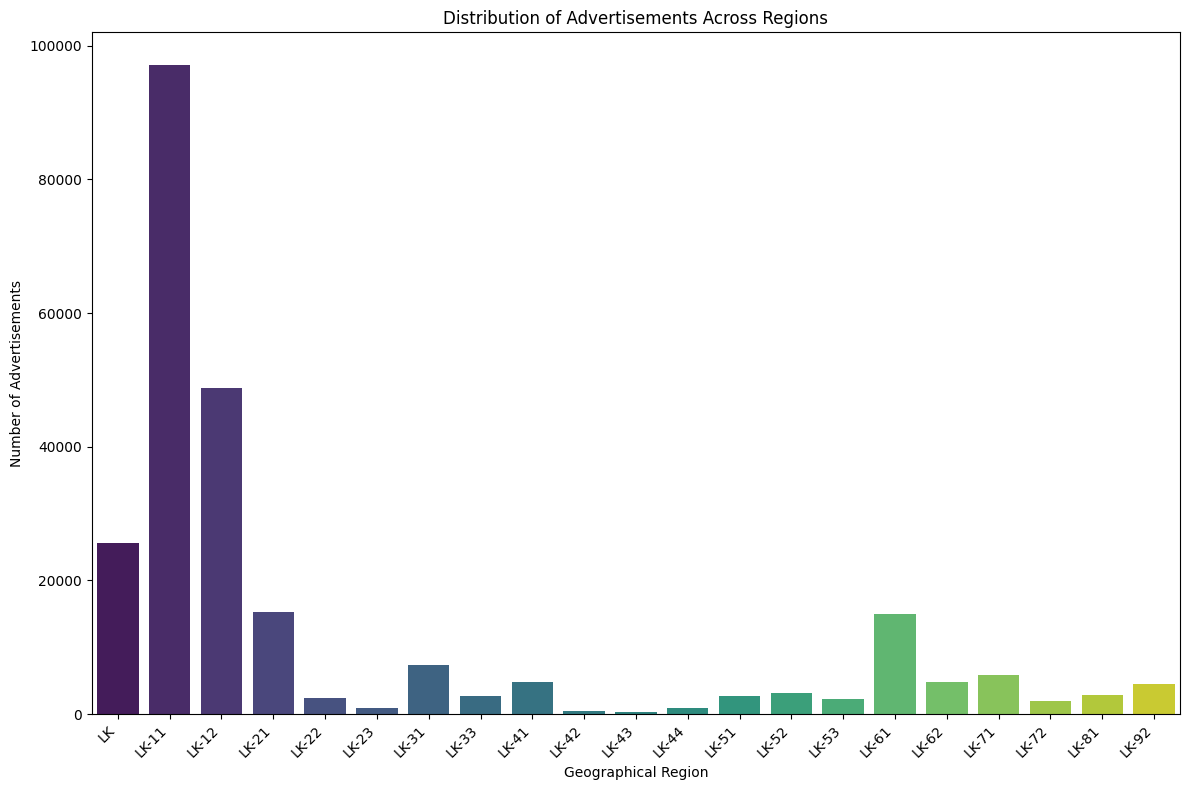

In [67]:
# Visualization using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=region_counts, x='geo_region', y='ad_count', palette='viridis')
plt.xlabel('Geographical Region')
plt.ylabel('Number of Advertisements')
plt.title('Distribution of Advertisements Across Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_20236\4192289661.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_analysis, x='geo_region', y='average_price', palette='viridis')


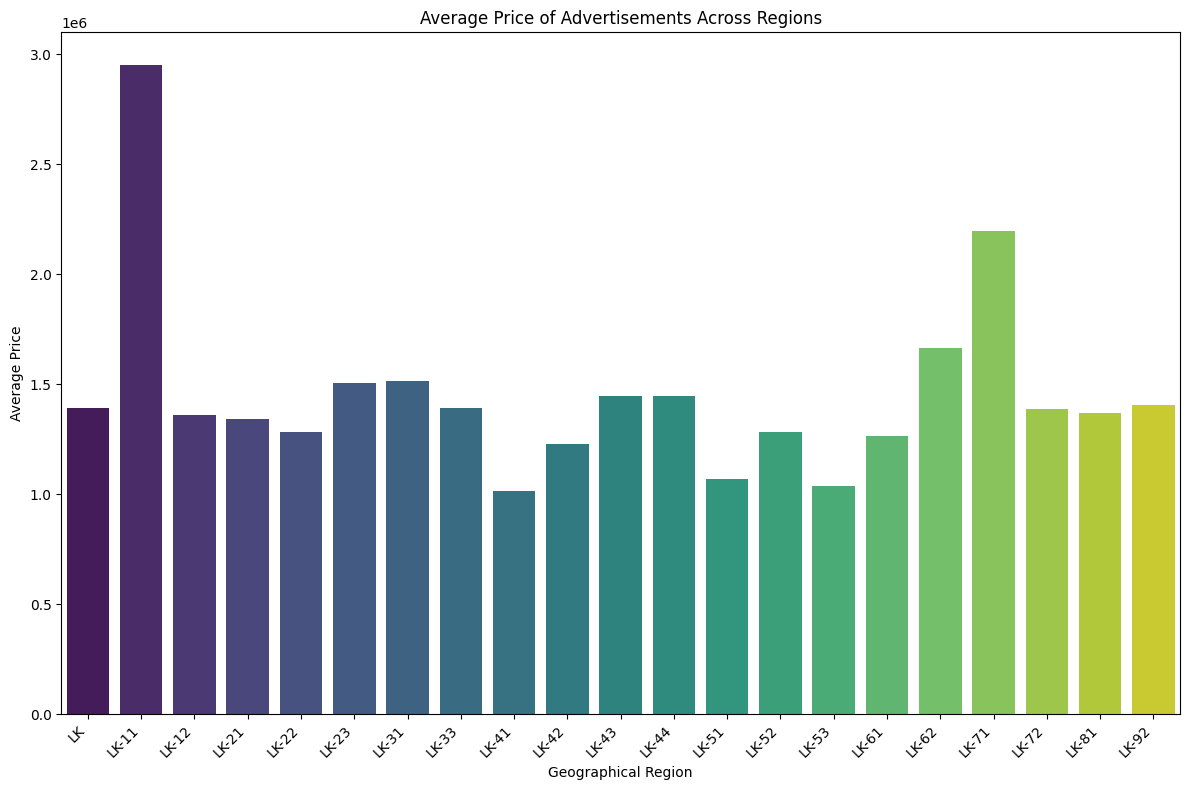

In [68]:
# Additional Analysis: Average price by region
average_price_by_region = df.groupby('geo_region')['price'].mean().reset_index()
average_price_by_region.columns = ['geo_region', 'average_price']

# Merge with region_counts
region_analysis = pd.merge(region_counts, average_price_by_region, on='geo_region')

# Visualize average price by region
plt.figure(figsize=(12, 8))
sns.barplot(data=region_analysis, x='geo_region', y='average_price', palette='viridis')
plt.xlabel('Geographical Region')
plt.ylabel('Average Price')
plt.title('Average Price of Advertisements Across Regions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

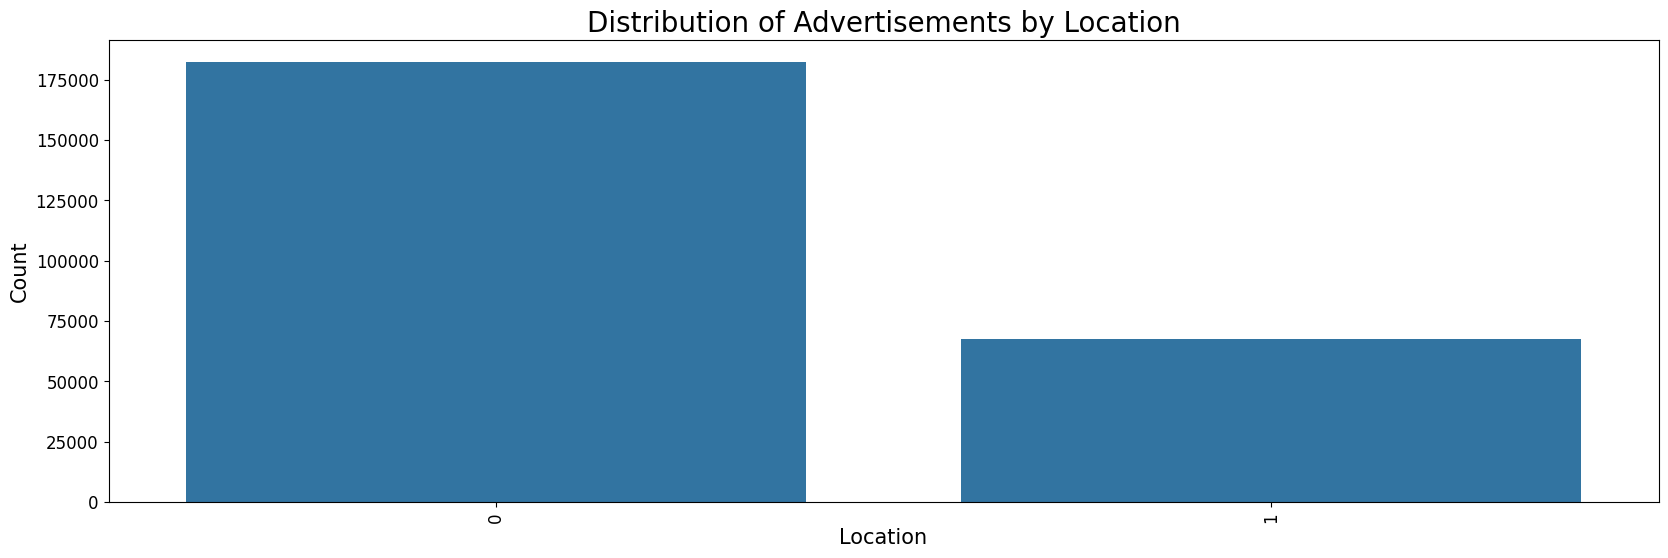

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'posted_date' to datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Group by location and count the number of advertisements
location_counts = df.groupby('location').size().reset_index(name='count')

# Plot the distribution of advertisements by location
plt.figure(figsize=(20, 6))
sns.barplot(x='location', y='count', data=location_counts)
plt.title('Distribution of Advertisements by Location', fontsize=20)
plt.xlabel('Location', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [70]:
# Identify regions with high demand and supply
region_counts = df.groupby('geo_region').size().reset_index(name='count')
high_demand_locations = location_counts.sort_values(by='count', ascending=False).head()
high_demand_regions = region_counts.sort_values(by='count', ascending=False).head()

print("Top Locations with High Demand:")
print(high_demand_locations)

print("Top Regions with High Demand:")
print(high_demand_regions)

Top Locations with High Demand:
   location   count
0         0  182334
1         1   67499
Top Regions with High Demand:
   geo_region  count
1       LK-11  97153
2       LK-12  48846
0          LK  25668
3       LK-21  15231
15      LK-61  15036


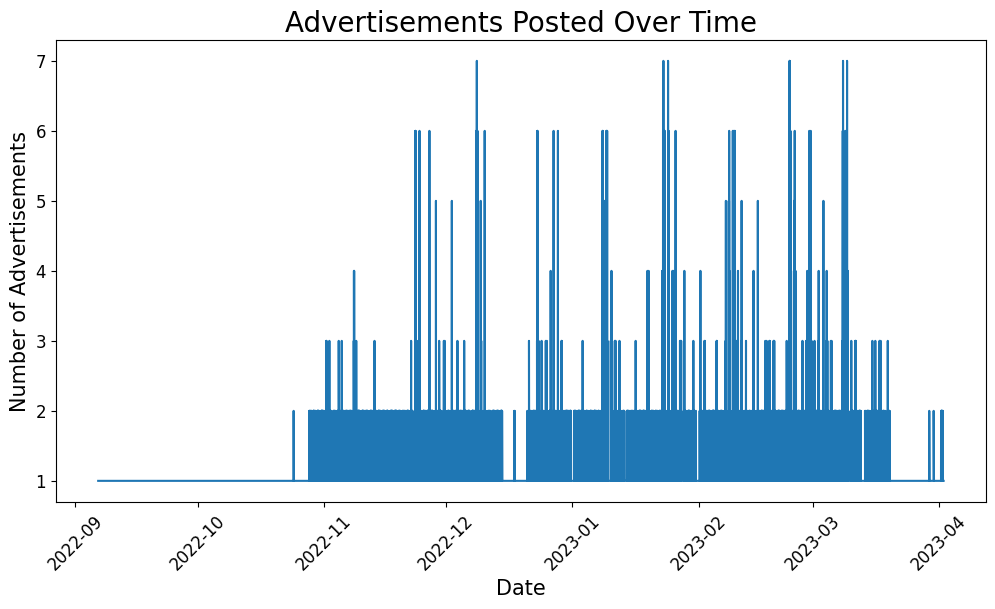

In [71]:
# Group by posted_date and count the number of advertisements
date_counts = df.groupby('posted_date').size().reset_index(name='count')

# Plot the advertisements posted over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='posted_date', y='count', data=date_counts)
plt.title('Advertisements Posted Over Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Advertisements', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [72]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['deactivation_date'] = pd.to_datetime(df['deactivation_date'])

# Extract temporal features
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['quarter'] = df['posted_date'].dt.quarter

# Clean and prepare data
df['geo_region'] = df['geo_region'].str.strip()

# Aggregate data by month and year to count the number of advertisements
monthly_ads = df.groupby(['year', 'month']).size().reset_index(name='ad_count')

# Create a date column for easier plotting
monthly_ads['date'] = pd.to_datetime(monthly_ads[['year', 'month']].assign(day=1))

# Sort by date
monthly_ads = monthly_ads.sort_values('date')

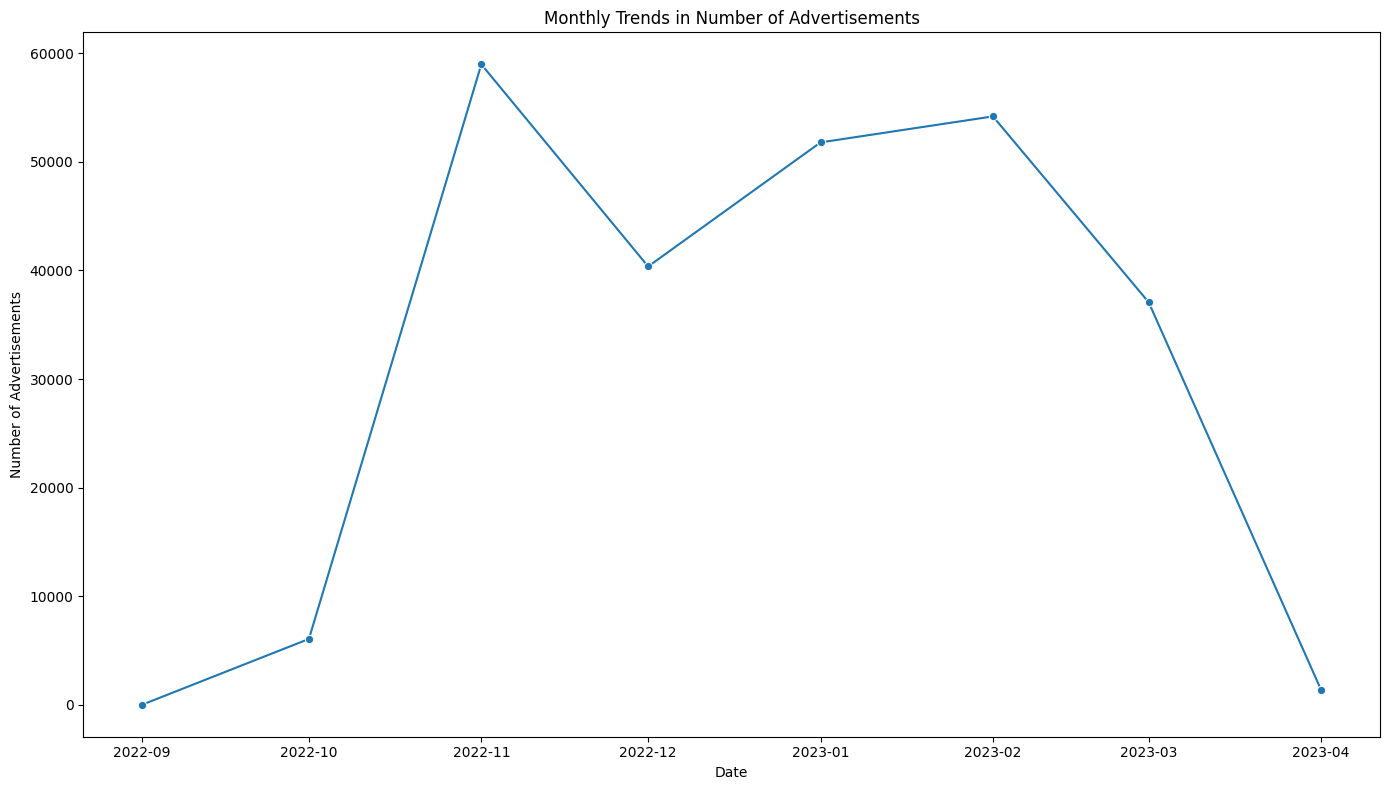

In [73]:
# Set the plot size
plt.figure(figsize=(14, 8))

# Create a line plot for monthly trends
sns.lineplot(data=monthly_ads, x='date', y='ad_count', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Advertisements')
plt.title('Monthly Trends in Number of Advertisements')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_20236\3052346262.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  quarterly_ads['date'] = pd.to_datetime(quarterly_ads['year'].astype(str) + 'Q' + quarterly_ads['quarter'].astype(str))


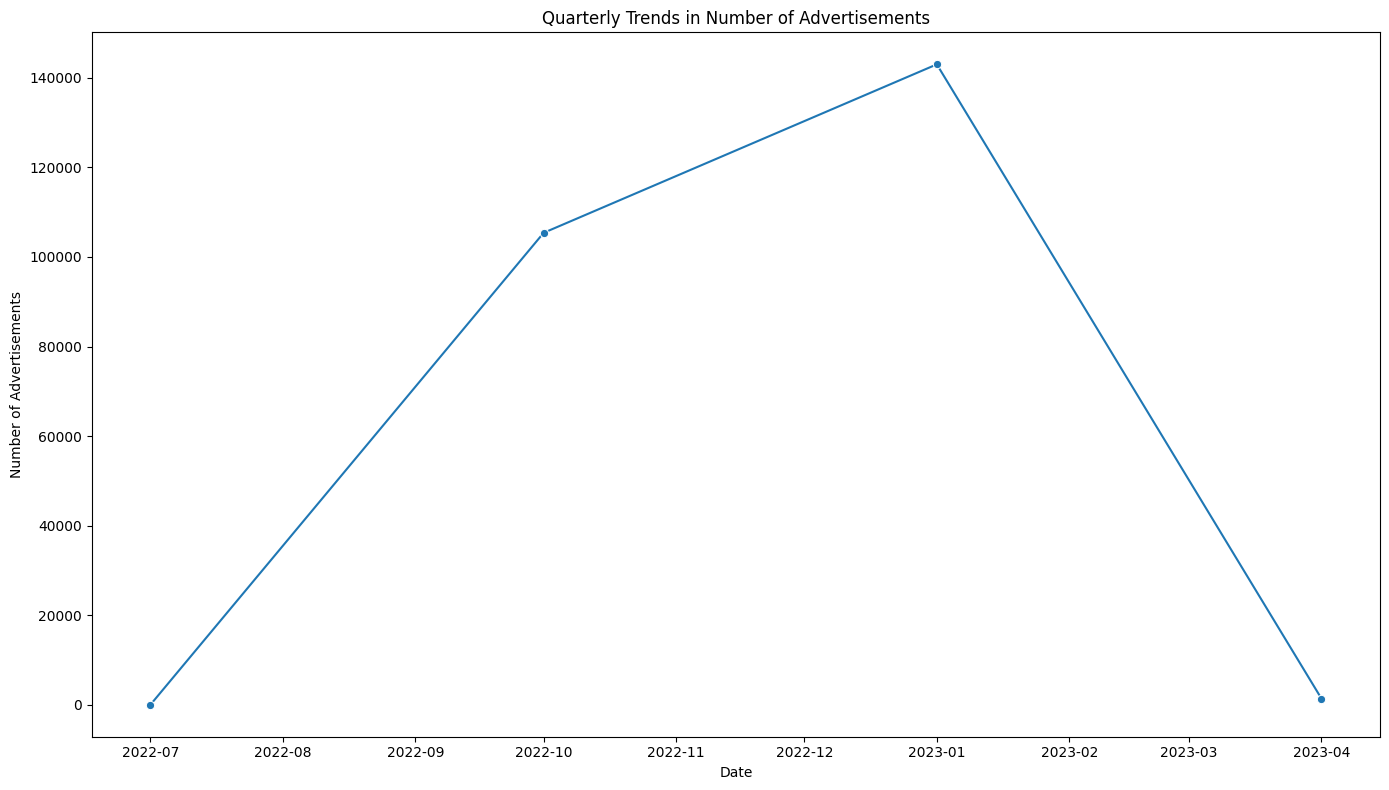

In [74]:
quarterly_ads = df.groupby(['year', 'quarter']).size().reset_index(name='ad_count')

# Create a date column for easier plotting
quarterly_ads['date'] = pd.to_datetime(quarterly_ads['year'].astype(str) + 'Q' + quarterly_ads['quarter'].astype(str))

# Sort by date
quarterly_ads = quarterly_ads.sort_values('date')

# Set the plot size
plt.figure(figsize=(14, 8))

# Create a line plot for quarterly trends
sns.lineplot(data=quarterly_ads, x='date', y='ad_count', marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Advertisements')
plt.title('Quarterly Trends in Number of Advertisements')

# Show plot
plt.tight_layout()
plt.show()

In [75]:
# Convert `posted_date` to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract temporal features
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['quarter'] = df['posted_date'].dt.quarter

# Strip whitespace from `geo_region` (if necessary)
df['geo_region'] = df['geo_region'].str.strip()

# Group by year, month, quarter, and geo_region and count the number of advertisements
df_grouped = df.groupby(['year', 'month', 'quarter', 'geo_region']).size().reset_index(name='ad_count')

# Encode categorical variables (using label encoding)
df_grouped['geo_region_encoded'] = df_grouped['geo_region'].astype('category').cat.codes

# Select features and target variable
features = ['year', 'month', 'quarter', 'geo_region_encoded']
target = 'ad_count'

X = df_grouped[features]
y = df_grouped[target]

# Ensure all column names are strings
X.columns = X.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Initialize and train your model (example with Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred

array([3640.14287132, -203.33230529, 2425.96456002,  296.19708196,
       2662.90694273, 1707.49386006, 3979.23245675, 1849.4649787 ,
        416.34535469, 1132.90516669, 2901.7602134 ,  256.37316604,
       -440.27468801,  177.49208402, 3401.28960065, 2566.0247907 ,
        137.66816809, 3023.81937407,  734.07970737, 3361.46568473,
       3839.17222606, 2784.96610341, 2287.34760411, -340.03837325,
       1331.93452143, 1946.34713072, 1590.69975006, -659.21600071,
       4078.02549673,  157.58012605, -420.36273004])

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12790175.289054302
R-squared: 0.1798796543259894


In [78]:
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract temporal features
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['quarter'] = df['posted_date'].dt.quarter

# Strip whitespace from `geo_region` (if necessary)
df['geo_region'] = df['geo_region'].str.strip()

# Group by year, month, quarter, and geo_region and count the number of advertisements
df_grouped = df.groupby(['year', 'month', 'quarter', 'geo_region']).size().reset_index(name='ad_count')

# Encode categorical variables (using label encoding)
df_grouped['geo_region_encoded'] = df_grouped['geo_region'].astype('category').cat.codes

X = df_grouped[['year', 'month', 'quarter', 'geo_region_encoded']]
y = df_grouped['ad_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Example: Scaling numeric features
    ('regressor', RandomForestRegressor(random_state=42))  # Example: RandomForestRegressor
])

# Define hyperparameters to tune using GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20],       # Maximum depth of the trees
    'regressor__min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'regressor__min_samples_leaf': [1, 2, 4]      # Minimum samples required at each leaf node
}

# Perform Grid Search CV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
# Evaluate the best model found by Grid Search on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Best Model Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Mean Squared Error (MSE): 1503470.9026462364
R-squared (R²): 0.90359576405147
